In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # pour la visualisation 
import seaborn as snb # La visualisation 

Question 1 : La phase de praitement de donnes

In [2]:
# Chargement  de données
titanic= pd.read_csv("titanic_dataset.csv")
titanic.shape



(891, 12)

In [3]:
# Les infos sur les index
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#Rechercher des données manquantes 
titanic.isnull().shape


(891, 12)

In [5]:
#Nettoyage de donnees 
#On rste avec seulement des donnes import pour bien visaluser 
titanic = titanic.drop(['Name',"Parch",'Ticket','Fare','Cabin','Embarked','PassengerId','SibSp'], axis=1)
titanic.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [6]:
"""from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
titanic['Sex'] = encoder.fit_transform(titanic['Sex'])"""

titanic =round(titanic,None)
display("Voici 5 premieres donnees",titanic.head(5),"5 dernires donnees ", titanic.tail(5))
# On vient  de faire un  encodage pour une présentation facile de donnees concernant les sex de passagers 
#D'ou female = 0 et male = 1

'Voici 5 premieres donnees'

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


'5 dernires donnees '

,Survived,Pclass,Sex,Age
886,0,2,male,27.0
887,1,1,female,19.0
888,0,3,female,NaN
889,1,1,male,26.0
890,0,3,male,32.0


In [7]:
titanic.describe()

,Survived,Pclass,Age
count,891.000000,891.000000,714.000000
mean,0.383838,2.308642,29.693277
std,0.486592,0.836071,14.524527
min,0.000000,1.000000,0.000000
25%,0.000000,2.000000,20.000000
50%,0.000000,3.000000,28.000000
75%,1.000000,3.000000,38.000000
max,1.000000,3.000000,80.000000


In [8]:
# la decription du ra
data =titanic.describe()
mean_age = round(data.loc["mean"
]['Age'],None )
print( "L'age moyenne des passagres est d'environ {} ans".format(mean_age))


#Ici on calucle le nombre des donnes qui manquent pour la section age
"""age = round(data.loc['count'][0]-data.loc['count'][3])
print("Il manque  {}".format(age))"""




L'age moyenne des passagres est d'environ 30 ans


'age = round(data.loc[\'count\'][0]-data.loc[\'count\'][3])\nprint("Il manque  {}".format(age))'

Dans cette partie on montre le nombre de survivants dans le titanic 

In [9]:
nbre_de_survis_en_pourcentage =round((data.loc['mean']['Survived'])*100)
print( "Il y'a eu pres de ",nbre_de_survis_en_pourcentage,"% de survivants")



######--On calcule le nombre de survis
nbr_survived=round((nbre_de_survis_en_pourcentage*(data.loc['count']['Survived'])/100))

print("Sur {} passegers seulement {} ont survecus".format(round((data.loc['count']['Survived'])/1,None), nbr_survived))



Il y'a eu pres de  38 % de survivants
Sur 891 passegers seulement 339 ont survecus


In [10]:

data = titanic.describe()
data.head(5)
age = round(data.loc['count']["Survived"]-data.loc['count']["Age"])
print("Il manque  {} données d'age ".format(age))

data.head(5)



Il manque  177 données d'age 


,Survived,Pclass,Age
count,891.000000,891.000000,714.000000
mean,0.383838,2.308642,29.693277
std,0.486592,0.836071,14.524527
min,0.000000,1.000000,0.000000
25%,0.000000,2.000000,20.000000


ON PASSE AI NETTOYAGE DE DONNEES POUR NE PAS CORROMPRE NOTRE MODELE 

In [11]:
# Le mondre de survivant
print("Pour combler ce vide on doit tout simplement  perdre le donnnees   au lieu de les remplacer")
data = titanic.dropna(axis=0)
print("On a maintenant  ",data.shape[0],"lignes "
)

 


Pour combler ce vide on doit tout simplement  perdre le donnnees   au lieu de les remplacer
On a maintenant   714 lignes 


In [12]:
"""from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
titanic['Sex'] = encoder.fit_transform(titanic['Sex'])"""

"from sklearn.preprocessing import LabelEncoder\nencoder = LabelEncoder()\ntitanic['Sex'] = encoder.fit_transform(titanic['Sex'])"

In [13]:
round(titanic.groupby(['Sex', 'Survived']).mean(), None)
#titanic['Survived_man '] = titanic['Survived']== 1 and  titanic['Sex']=="male"


Pclass   Age
Sex    Survived              
female 0            3.0  25.0
       1            2.0  29.0
male   0            2.0  32.0
       1            2.0  27.0

On veut voir sur la presentation le nombre 

D'apres cette presentation on voit que beaucoup de femmes ont survecu au naufrage de titanic 



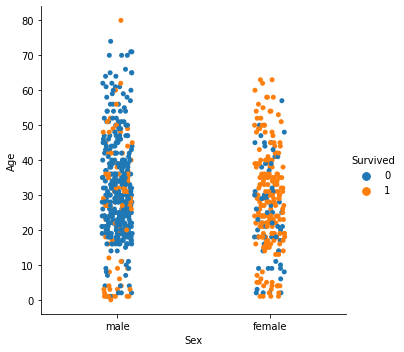

In [14]:
print("D'apres cette presentation on voit que beaucoup de femmes ont survecu au naufrage de titanic ")
snb.catplot(y="Age", x="Sex", data= titanic, hue="Survived")
print("")


Cette presentation de box qui nous permet de voir

<AxesSubplot:xlabel='Sex', ylabel='Age'>

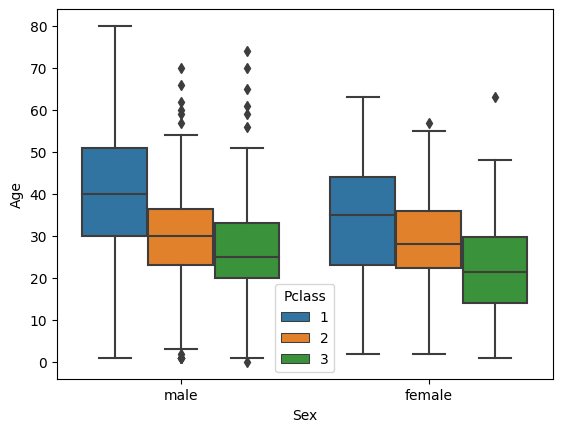

In [15]:
snb.boxplot(y="Age", x="Sex", data= titanic, hue="Pclass")

In [16]:
df= pd.read_csv("titanic_dataset.csv")


La fonction qui nous montre la carte de corraltion de notre dataframe 

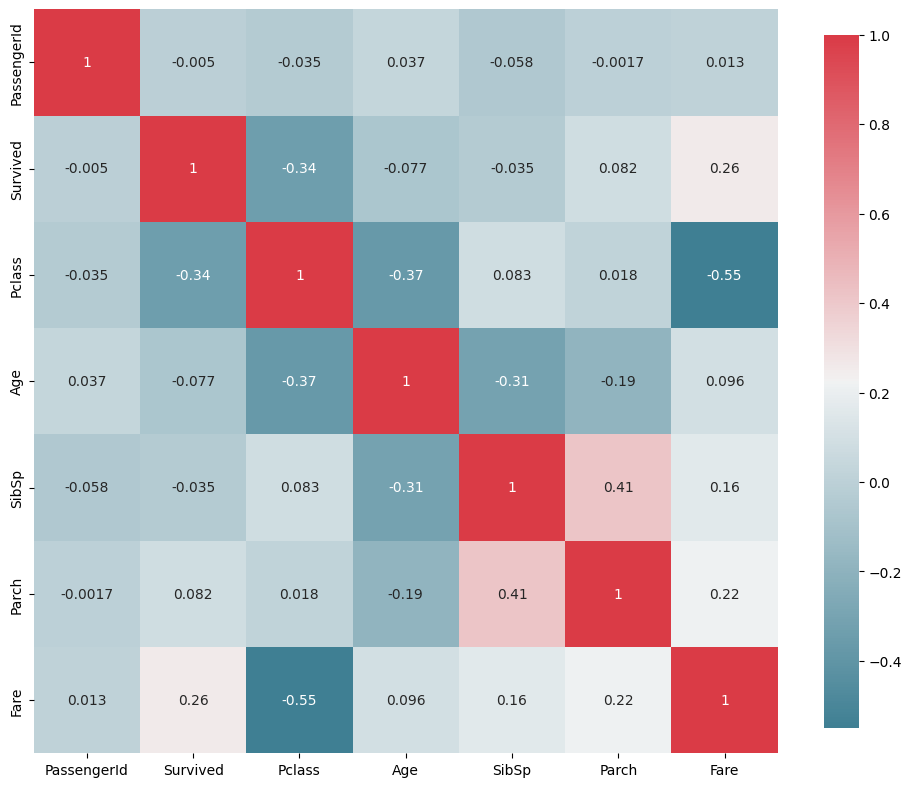

In [17]:
# la fonction nous permet de donner la catre de la correlation entre les diffrentes donnees  de note data frame 

def plot_correlation_map( df ):

    corr = df.corr() #Ici on a

    s , ax = plt.subplots( figsize =( 12 , 10 ) ) # 

    cmap = snb.diverging_palette( 220 , 10 , as_cmap = True )

    s = snb.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 10}

        )
plot_correlation_map(df
)

In [18]:
df1 = df.drop(["Name",'Ticket','Fare','Embarked',], axis=1)

---

LA CORRELATION SANS LES NOMS,TICKET, FARE, EMBARKED

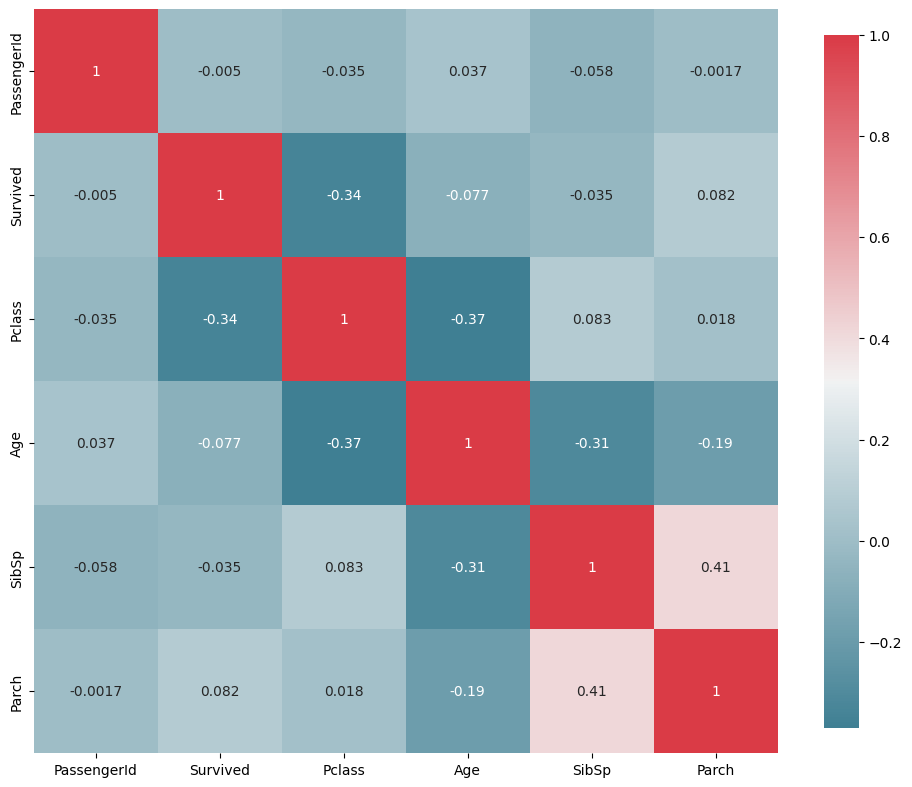

In [19]:
plot_correlation_map(df1
)

Our precedent function 